In [1]:
import numpy as np
import tensorflow as tf

In [4]:
rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])

In [5]:
x = np.concatenate((x1, x2), axis=0)

In [7]:
import matplotlib.pyplot as plt
plt.plot(x)

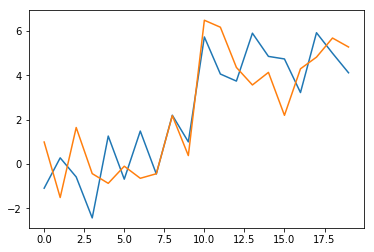

In [9]:
plt.plot(x)


In [11]:
x

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ],
       [ 5.73736858,  6.49073203],
       [ 4.06416613,  6.17582904],
       [ 3.74611933,  4.3622485 ],
       [ 5.9071052 ,  3.5713193 ],
       [ 4.85993128,  4.1382451 ],
       [ 4.74438063,  2.20141089],
       [ 3.2284669 ,  4.30012277],
       [ 5.92746243,  4.82636432],
       [ 5.00284592,  5.68822271],
       [ 4.12046366,  5.28362732]])

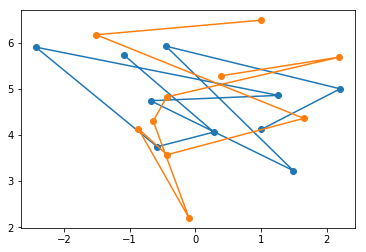

In [15]:
plt.plot(x1, x2, marker='o')

In [17]:
np.zeros(d)
b = 0

In [18]:
def y(x):
    return step(np.dot(w, x) + b)

def step(x):
    return 1 * (x>0)


In [19]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [22]:
w=0
while True:
    classified = True
    for i in range(N * 2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified.all():
        break

In [23]:
w

array([1.55172212, 1.22497552])

In [24]:
b

array([-10, -10])

In [25]:
classified

array([ True,  True])

In [26]:
y([0, 0])

array([0, 0])

In [27]:
y([5,5])

array([1, 1])

In [28]:
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

In [29]:
print(w)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>


In [32]:
def y(x):
    return sigmoid(np.dot(w, x) + b)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x, w) + b) 

In [35]:
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))

In [36]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [43]:
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

In [44]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

In [45]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [46]:
for epoch in range(200):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })

In [47]:
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})

In [48]:
print(classified)

[[ True]
 [ True]
 [ True]
 [ True]]


In [49]:
prob = y.eval(session=sess, feed_dict={
    x: X,
    y: Y
})
print(prob)

[[0.]
 [1.]
 [1.]
 [1.]]


In [51]:
print('w', sess.run(w))
print('b', sess.run(b))

w [[3.6118839]
 [3.6118839]]
b [-1.2450948]


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([
    Dense(input_dim=2, units=1),
    Activation('sigmoid')
])

In [54]:
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))


In [56]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

In [57]:
X = np.array([[0, 0], [0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[1]])

In [58]:
model.fit(X, Y, epochs=200, batch_size=1)

Epoch 1/200
4/4 [==============================] - 0s 35ms/step - loss: 0.6055
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5641
Epoch 3/200
4/4 [==============================] - 0s 1000us/step - loss: 0.5313
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5052
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4843
Epoch 6/200
4/4 [==============================] - 0s 999us/step - loss: 0.4670
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4522
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4400
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4287
Epoch 10/200
4/4 [==============================] - 0s 749us/step - loss: 0.4190
Epoch 11/200
4/4 [==============================] - 0s 999us/step - loss: 0.4105
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4030
Epoch 13/200
4/4 [==============================] -

4/4 [==============================] - 0s 1ms/step - loss: 0.1743
Epoch 104/200
4/4 [==============================] - 0s 999us/step - loss: 0.1732
Epoch 105/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1721
Epoch 106/200
4/4 [==============================] - 0s 999us/step - loss: 0.1710
Epoch 107/200
4/4 [==============================] - 0s 999us/step - loss: 0.1700
Epoch 108/200
4/4 [==============================] - 0s 749us/step - loss: 0.1689
Epoch 109/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 110/200
4/4 [==============================] - 0s 999us/step - loss: 0.1668
Epoch 111/200
4/4 [==============================] - 0s 749us/step - loss: 0.1658
Epoch 112/200
4/4 [==============================] - 0s 1000us/step - loss: 0.1648
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 114/200
4/4 [==============================] - 0s 750us/step - loss: 0.1628
Epoch 115/200
4/4 [==================

In [60]:
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

In [61]:
print(classes)
print()
print(prob)

[[0]
 [1]
 [1]
 [1]]

[[0.21734266]
 [0.9223875 ]
 [0.911267  ]
 [0.99772996]]
